# Multiple Regression Machine Learning Analysis on Boston House Prices

## Data Loading

The dataset used for this analysis is Boston houseprice dataset. There are 13 attributes and one target variable: the Median value of an owner-occupied home in $1000s.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

## Data Exploration

### Dataset Characteristics

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The information above shows that there are no missing attribute values, therefore we do not have to handle missing values for this dataset. The shape of the data is (506,13) which means that we have 506 data points, 13 attributes and 1 target variable for our dataset. The target variable is the median value of owner-occupied homes in $1000s and there are 13 independent variables (attributes): 

1. CRIM: per capital crime rate by town
2. ZN: the proportion of residential land zoned for lots of 25,000 square feet
3. INDUS: the proportion of non-retail business acres per t own
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration in parts per 10 million
6. RM: the average number of rooms per dwelling
7. AGE: the proportion of owner-occupied units built prior to 1940
8. DIS: the weighted distances to five Boston employment centres
9. RAD: the index of accessibility to radial highways
10. TAX: the full-value property-tax rate per $10,000
11. PTRATIO: the pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population

In [4]:
print(f'  Data shape = {boston.data.shape}')
print(f'Target shape = {boston.target.shape}')

  Data shape = (506, 13)
Target shape = (506,)


In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Loading the Data into a Dataframe and Exploring the Data

In [6]:
import pandas as pd

boston_df = pd.DataFrame(boston.data, 
                             columns=boston.feature_names)
boston_df['MedHouseValue'] = pd.Series(boston.target)
max(boston_df['MedHouseValue'])

50.0

In [7]:
pd.set_option('precision', 4)
pd.set_option('max_columns', 9)
pd.set_option('display.width', None)

boston_df.head()

,CRIM,ZN,INDUS,CHAS,...,PTRATIO,B,LSTAT,MedHouseValue
0,0.0063,18.0,2.31,0.0,...,15.3,396.90,4.98,24.0
1,0.0273,0.0,7.07,0.0,...,17.8,396.90,9.14,21.6
2,0.0273,0.0,7.07,0.0,...,17.8,392.83,4.03,34.7
3,0.0324,0.0,2.18,0.0,...,18.7,394.63,2.94,33.4
4,0.0691,0.0,2.18,0.0,...,18.7,396.90,5.33,36.2


In [8]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,...,PTRATIO,B,LSTAT,MedHouseValue
count,506.0000,506.0000,506.0000,506.0000,...,506.0000,506.0000,506.0000,506.0000
mean,3.6135,11.3636,11.1368,0.0692,...,18.4555,356.6740,12.6531,22.5328
std,8.6015,23.3225,6.8604,0.2540,...,2.1649,91.2949,7.1411,9.1971
min,0.0063,0.0000,0.4600,0.0000,...,12.6000,0.3200,1.7300,5.0000
25%,0.0820,0.0000,5.1900,0.0000,...,17.4000,375.3775,6.9500,17.0250
50%,0.2565,0.0000,9.6900,0.0000,...,19.0500,391.4400,11.3600,21.2000
75%,3.6771,12.5000,18.1000,0.0000,...,20.2000,396.2250,16.9550,25.0000
max,88.9762,100.0000,27.7400,1.0000,...,22.0000,396.9000,37.9700,50.0000


In [9]:
boston_df.dtypes

CRIM             float64
ZN               float64
INDUS            float64
CHAS             float64
NOX              float64
RM               float64
AGE              float64
DIS              float64
RAD              float64
TAX              float64
PTRATIO          float64
B                float64
LSTAT            float64
MedHouseValue    float64
dtype: object

As shown above, all the attribute values are numberic so we do not need to convert any categoriacal values to numeric.

## Data Visualization

As no data cleanup is required, we can now create visualizations for each of the 13 attributes.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)
sns.set_style('whitegrid')

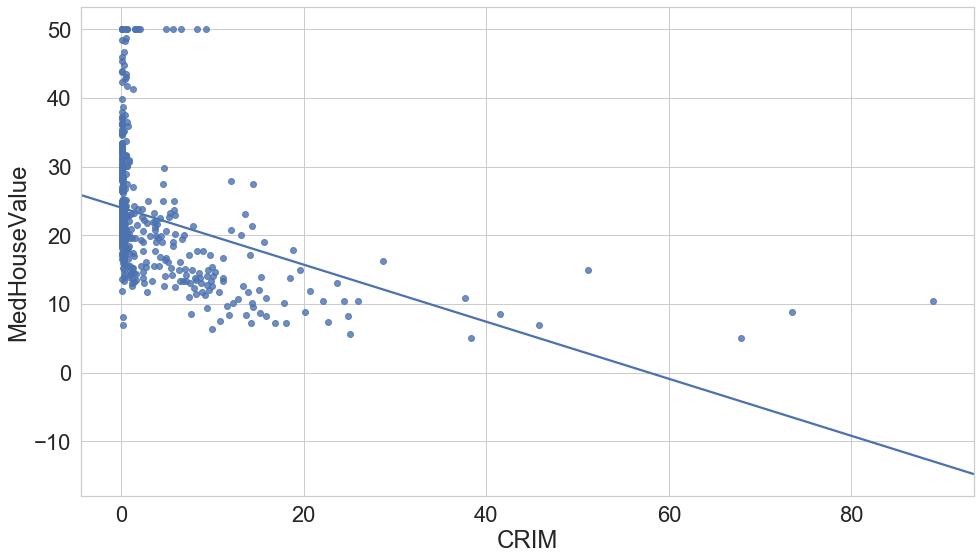

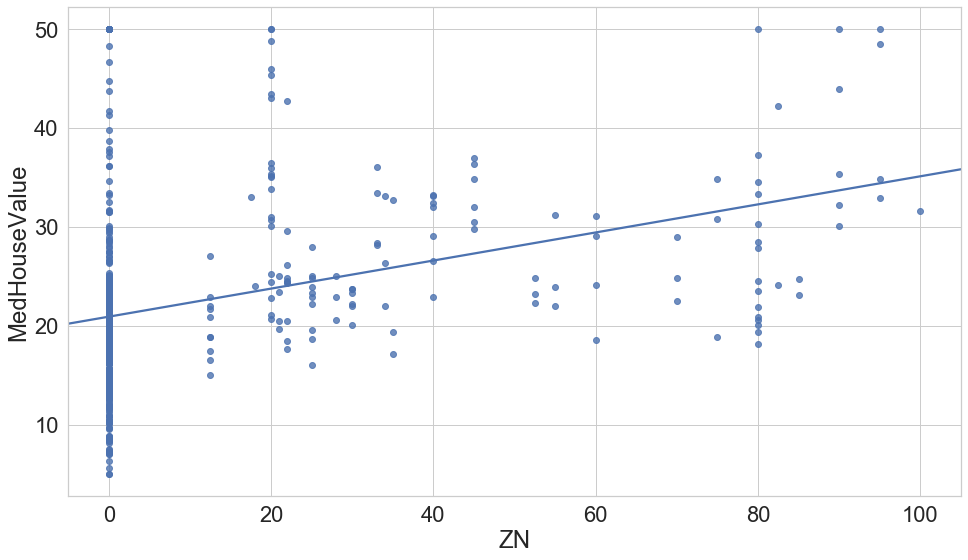

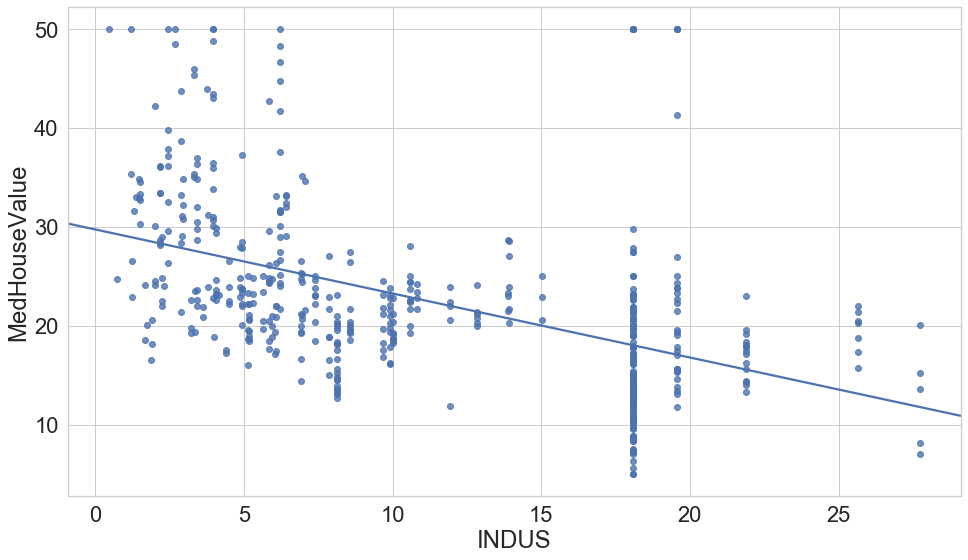

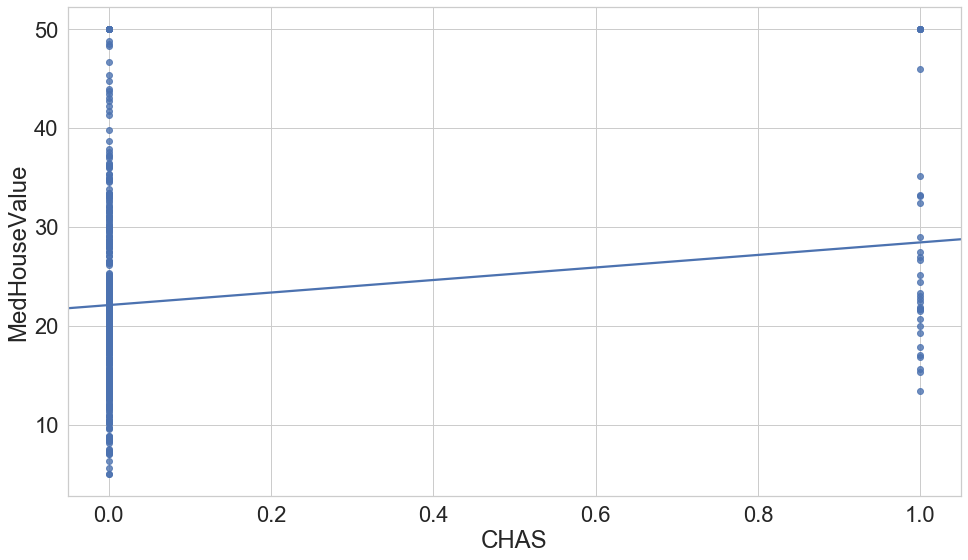

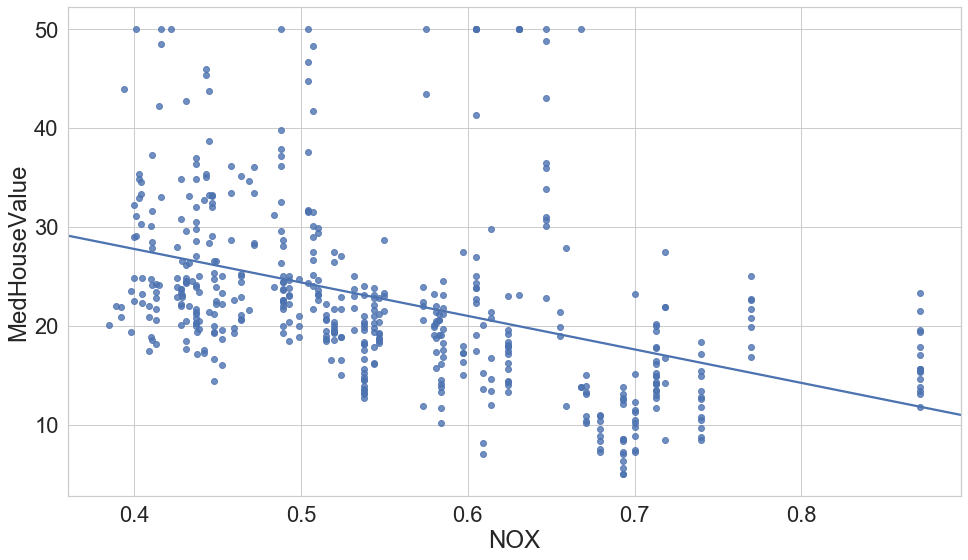

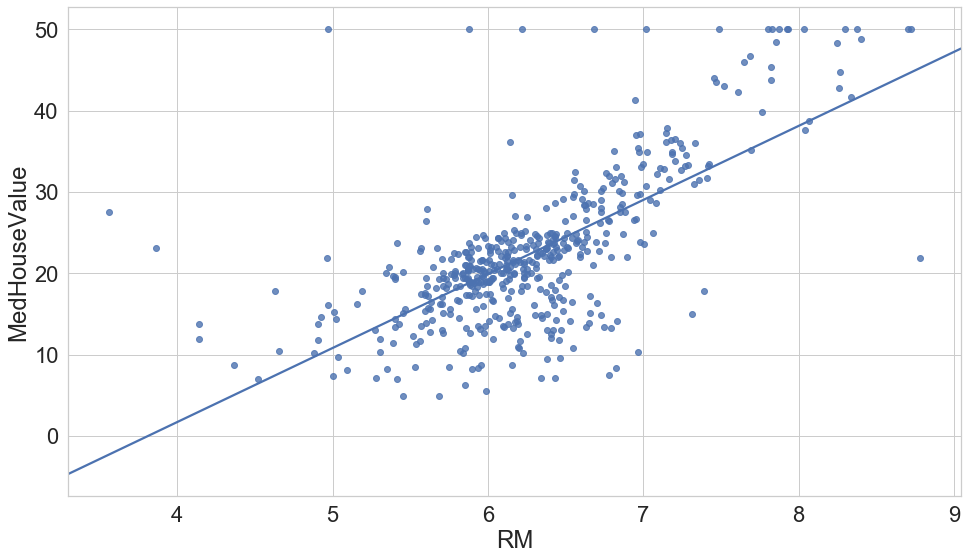

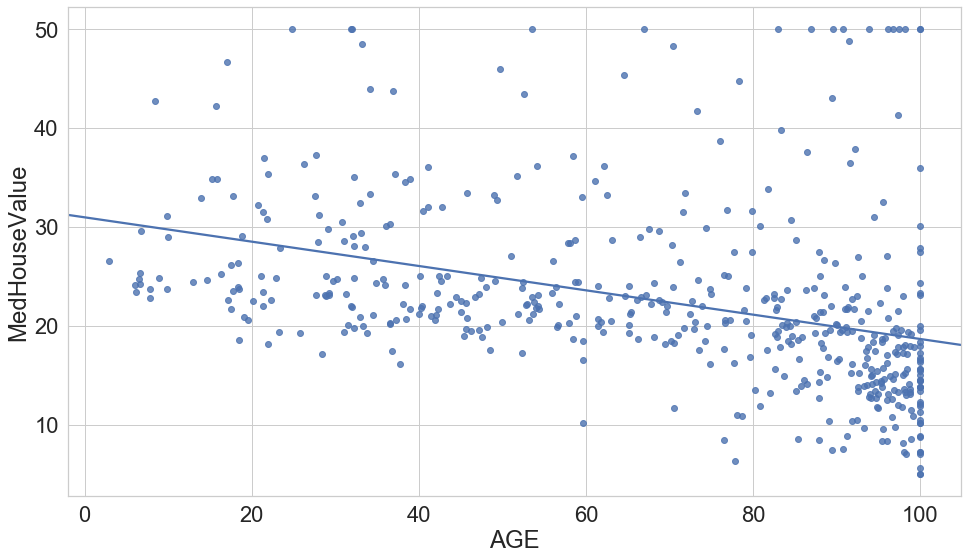

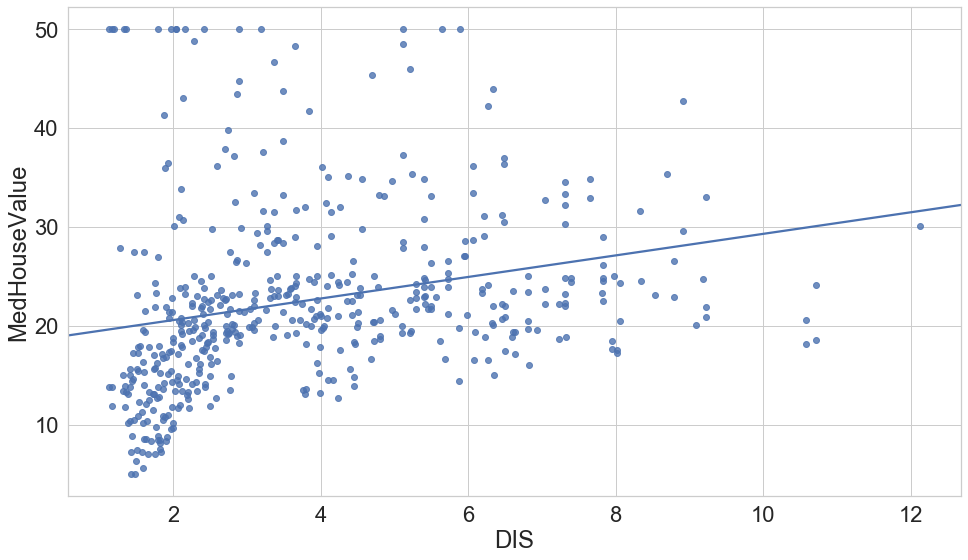

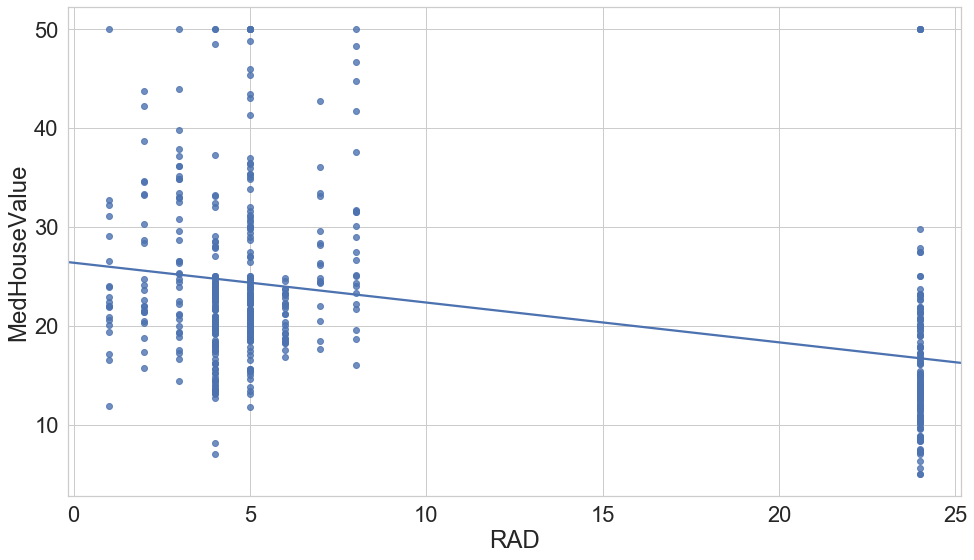

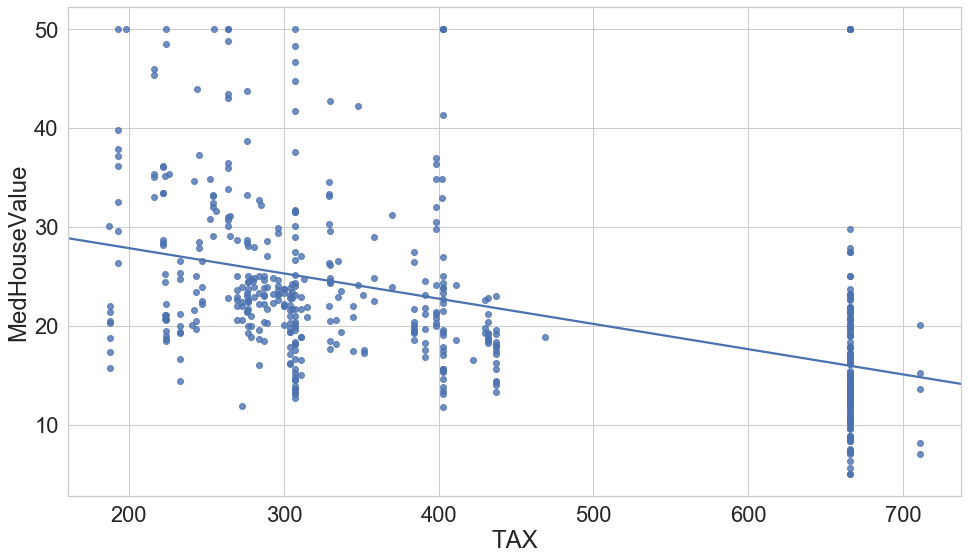

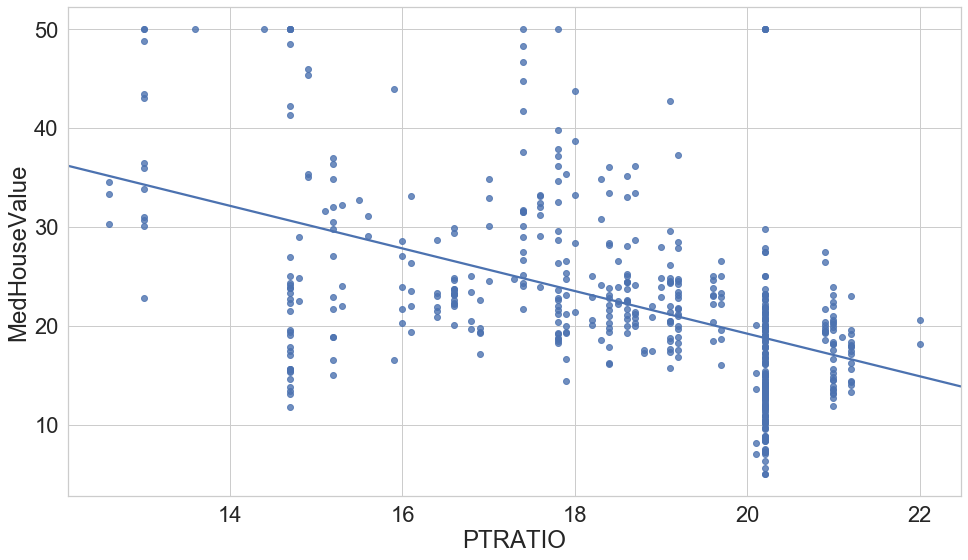

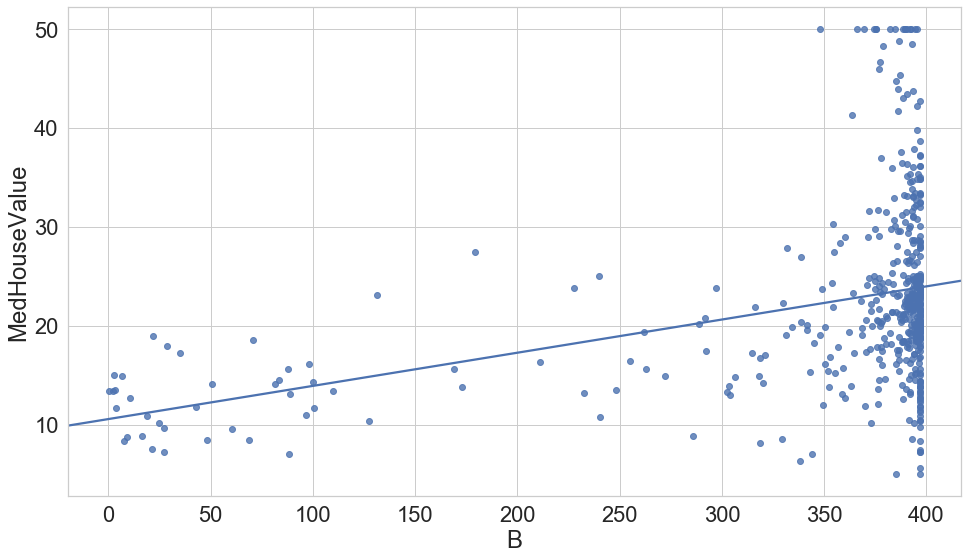

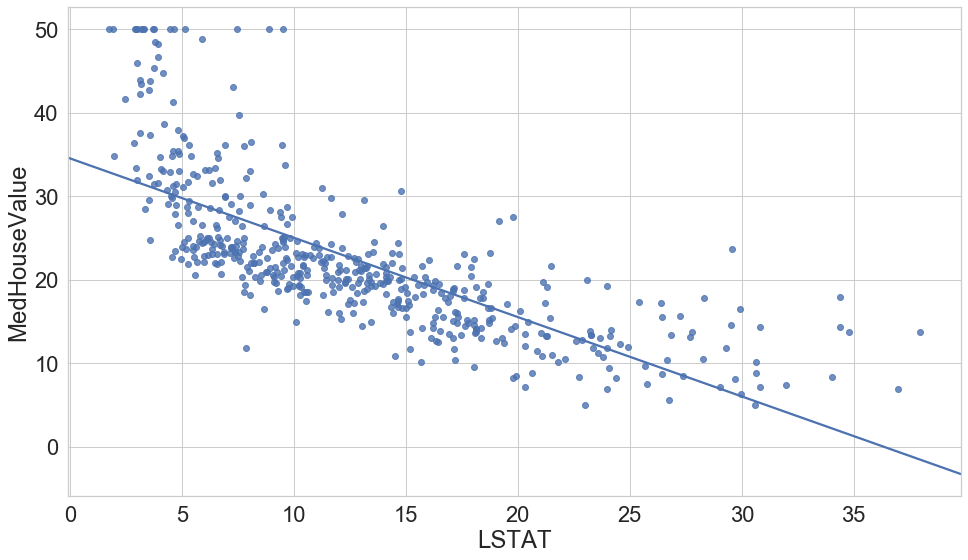

In [11]:
for feature in boston.feature_names:
     plt.figure(figsize=(16, 9))
     sns.regplot(data=boston_df, x=feature, y='MedHouseValue',scatter=True,ci=None)

The above figures show that five features, i.e., NOX, RM, AGE, DIS and LSTAT, have a relatively apparent linear relationship with the target (the median house value).  

## Multiple Regression Machine Learning Analysis

### Splitting the Data Into Training and Testing Data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(boston.data, boston.target, random_state=11)

print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (379, 13)
Shape of testing  set = (127, 13)


As shown above, both the training and testing data have 13 variables. The training data has 379 values and the testing set has 127 values.

### Training the Model 

In [13]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(boston.feature_names):
    print(f'{name:>11}: {linear_regression.coef_[i]:10.4f}')

print()
print(f'y-intercept: {linear_regression.intercept_:10.4f}')

       CRIM:    -0.0969
         ZN:     0.0487
      INDUS:     0.0229
       CHAS:     2.9333
        NOX:   -18.6304
         RM:     4.3998
        AGE:     0.0117
        DIS:    -1.3922
        RAD:     0.3162
        TAX:    -0.0133
    PTRATIO:    -0.8761
          B:     0.0112
      LSTAT:    -0.4890

y-intercept:    29.9617


The regression coefficients of the 13 independent variables are shown by the above calculations. According to the size of these values, we found that the nitric oxides concentration (parts per 10 million) has the most effect on the median house value while the proportion of blacks in a town affects the median house value the least. Specifically, the median of house value in a town will decrease more than 18 units as the nitric oxides concentration (parts per 10 million) increases 1 unit when other factors don't change. A 1 unit rise of the independent variable B will only lead to 0.01 unit increase of the median house value.


In order of highest to lowest influence, the following attributes have a positive regression coefficient and increase the median home value: 


* RM: the average number of rooms per dwelling
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* RAD: the index of accessibility to radial highways
* ZN: the proportion of residential land zoned for lots of 25,000 square feet
* INDUS: the proportion of non-retail business acres per t own
* AGE: the proportion of owner-occupied units built prior to 1940
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town


This means that a greater proportion of residential land zoned for lots over 25,000 sqft, a larger index of accessibility to radial highways, a higher proportion of non-retail business acres per town, the house’s tract bounding Charles River, more average number of rooms per dwelling, a greater proportion of owner-occupied units built prior to 1940 and a higher proportion of blacks could make a house more valuable. 


In order of highest to lowest influence, the 6 attributes that affect median house value negative are:  

* NOX: nitric oxides concentration in parts per 10 million
* DIS: the weighted distances to five Boston employment centres
* PTRATIO: the pupil-teacher ratio by town
* LSTAT: % lower status of the population
* CRIM: per capital crime rate by town
* TAX: the full-value property-tax rate per $10,000


This means that if a town has a higher per capita crime rate, or a higher nitric oxides concentration, or a farther distance to five Boston employment centers, or a higher property-tax rate, or a greater pupil-teacher ration, or its lower status of the population accounts for more, the median house value of this town will be less.


To more easily single out the attributes that have the largest impact on the target variable, we can sort the attributes based on the absolute value of the regression coefficient . As shown by the list below, the top 5 attributes that have the strongest influence on the median home value are: 

* NOX: nitric oxides concentration in parts per 10 million (**negative influence**)
* RM: the average number of rooms per dwelling (**positive influence**)
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (**positive influence**)
* DIS: the weighted distances to five Boston employment centres (**negative influence**)
* PTRATIO: the pupil-teacher ratio by town (**negative influence**)

The two variables that increase house value the most are the number of rooms and being close to the river. This suggests that these two attributes are desirable attributes that increase home value in Boston. The three variables that decrease house value the most are nitric oxide concentration, proximity to employment centres and pupil-teacher ratios. This suggests that these are not desirable attributes and that they reduce home value in Boston. 

The above analysis indicates that there are two kinds of factors which may have an influence on a house value, that is, characteristics of the house itself and environment in the area where the house is located. As for the characteristics of the house itself, the more rooms a house has the more valuable it may be. If a house's tract bounds a river, the value of the house will be greater. If the distance between a house and employment centers is shorter, the house may have a higher value. As for the environment in the area where a house is located, the more old and big houses there are in that area, the more expensive that house it is. Besides, a house will also be more valuable if it is in an area with convenient transportation, sufficient teachers, clean air, low crime rate and property-tax rate as well as a high proportion of non-retail business acres. What's more, if most residents in an area have a higher social status, houses in that area will be more valuable.

However, we don't know at which level the influence of these independent variables analysed above can be supported as the results didn't illustrate the p-value or standard deviation of those coefficients. If the 5\% level of significance is considered, it is possible that the influence of some factors may be not significant. A further detailed research should be conducted if we want to figure out it.

In [14]:
from sklearn.linear_model import LinearRegression
from operator import *

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

regression_coefficients={}

for i, name in enumerate(boston.feature_names):
    if regression_coefficients.get(name)==None:
        regression_coefficients[name]=abs(linear_regression.coef_[i])

regression_coefficients_sorted=sorted(regression_coefficients.items(), key=itemgetter(1),reverse=True) # sorts the items based on the value

for key,value in regression_coefficients_sorted: 
    print(f'{key}: {value}')

NOX: 18.63035525511396
RM: 4.3997975898181165
CHAS: 2.9333208871574983
DIS: 1.3921735650048146
PTRATIO: 0.8761352628762056
LSTAT: 0.48900667475591525
RAD: 0.31624284374118644
CRIM: 0.09688982758105275
ZN: 0.04868975356746368
INDUS: 0.022920925360373025
TAX: 0.013328903299485738
AGE: 0.011654478970855548
B: 0.011239848501602104


### Testing the Model

In [17]:
import math
from sklearn import metrics

predicted = linear_regression.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.2f}')
print(f'     correlation coefficient = {r:.2f}')

coefficient of determination = 0.68
     correlation coefficient = 0.83


As shown above, the coefficient of determination is 0.68, which means that 68% of the variation in home prices in Boston can be attributed to a linear relationship between the 13 attributes and the home price. The correlation coefficient is 0.83 which indicates that the linear relationship between the 13 attributes and the house prices is strong.

## Visualizing the Predicted vs. Expected Values

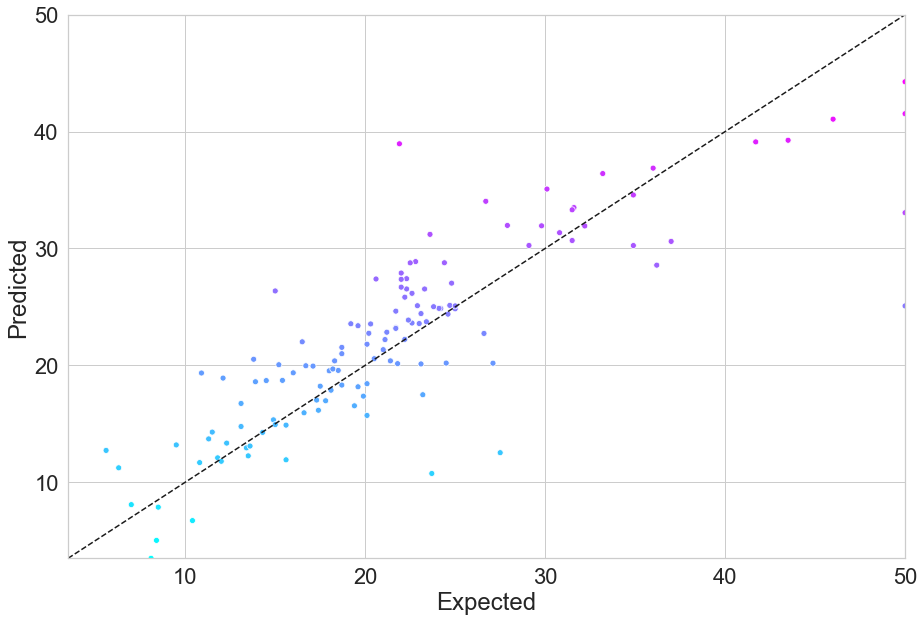

In [16]:
df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

The correlation coefficient of actual values and the values predicted by our model is 0.83 and their coefficient of determination is 0.68. This means there is a strong linear correlation between the actual values and predicted values. Moreover, the scatterplot of actual vs. predicted values demonstrates that most of the data points are distributed along the dividing line which is inclined at 45-degree angle to the x axis. As a result, we can conclude that our model's predictions of median home values are good.